# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, delimiter='\t')

### Step 4. See the first 10 entries

In [3]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

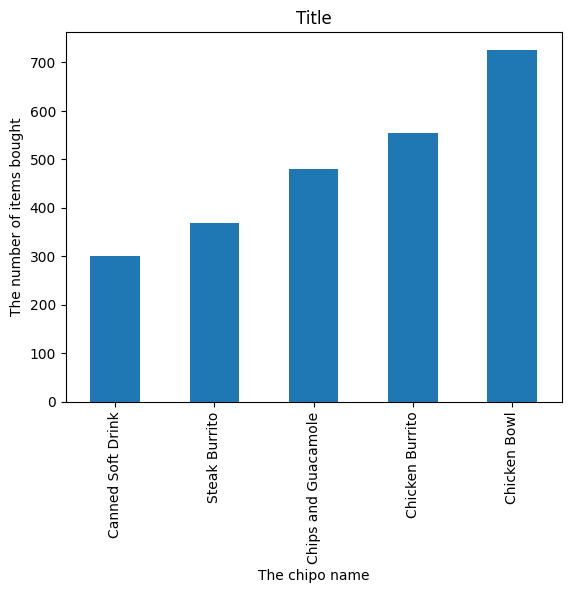

In [7]:
x = chipo.item_name

letters_count = Counter(x)

df = pd.DataFrame.from_dict(letters_count, 'index')

df = df[0].sort_values(ascending=True)[45:50]

df.plot(kind='bar')

plt.xlabel('The chipo name')
plt.ylabel('The number of items bought')
plt.title('Title')

plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [9]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [11]:
chipo.item_price = [float(value[1:-1]) for value in chipo.item_price]

orders = chipo.groupby('order_id').sum()

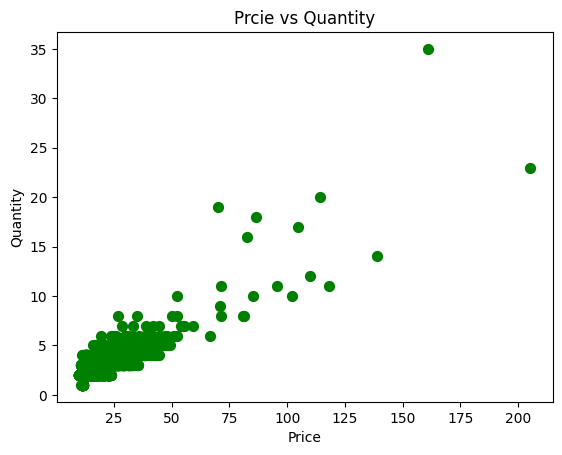

In [17]:
plt.scatter(x=orders.item_price, y=orders.quantity, s=50, c = 'green')
plt.xlabel("Price")
plt.ylabel("Quantity")
plt.title("Prcie vs Quantity")
plt.show()

### Step 7. BONUS: Create a question and a graph to answer your own question.

In [18]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [19]:
items = chipo.groupby('item_name').sum()

In [20]:
items.head()

,order_id,quantity,choice_description,item_price
item_name,,,,
6 Pack Soft Drink,52322,55,[Sprite][Diet Coke][Coke][Diet Coke][Diet Coke...,356.95
Barbacoa Bowl,53972,66,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",672.36
Barbacoa Burrito,74718,91,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",894.75
Barbacoa Crispy Tacos,5613,12,"[Tomatillo Red Chili Salsa, [Rice, Black Beans...",120.21
Barbacoa Salad Bowl,9708,10,"[Fresh Tomato Salsa, [Rice, Fajita Vegetables,...",106.40


In [27]:
items = items[items.item_price >= 1000]

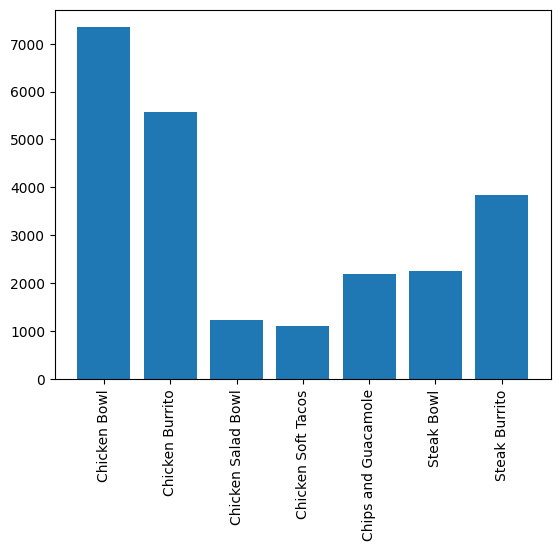

In [28]:
plt.bar(items.index, items.item_price)
plt.xticks(rotation=90)
plt.show()